<p style='font-size:20px ; color: #ff0000; text-align:center'>Проект. Разведывательный анализ данных</p>

Задачей проекта являлось проведение разведывательного анализа данных для определения параметров будущей модели. <br>
Изначальные данные представляют собой набор параметров учащихся в возрасте от 15 до 22 лет.  <br>
Целью проекта являлось выявление таких параметров, которые могут существенно влиять на успеваемость учащихся.<br>

Этапы работы над проектом:
*	Для количественных переменных построены гистограммы распределений. Найдены и убраны выбросы.
*	Произведена необходимая очистка данных для корректного проведения t-теста.
*	Для каждого столбца произведена оценка уникальных значений. Найдено количество пустых строк. Устранены ошибки.
*	Произведен корреляционный анализ количественных переменных. Выполнен отбор не коррелирующих переменных.
*	Проанализированы номинативные переменные и с помощью t-теста устранены те, которые не влияют на предсказываемую величину (score).
*	Осуществлена ручная проверка гипотезы о влияния избрачного параметра romantic на параметр score. Подтвержден результат t-теста.
*	Сформулированы выводы относительно переменных, которые будет использованы в дальнейшем построении модели.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind, t
from statsmodels.stats import weightstats

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.xls')

In [2]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

<b>Числовые переменные:</b>

age — возраст ученика (от 15 до 22)<br>
absences — количество пропущенных занятий<br>
score — баллы по госэкзамену по математике<br>


<b>Номинативные переменные:</b>

school — аббревиатура школы, в которой учится ученик<br>
sex — пол ученика ('F' - женский, 'M' - мужской)<br>
address — тип адреса ученика ('U' - городской, 'R' - за городом)<br>
famsize — размер семьи('LE3' <= 3, 'GT3' >3)<br>
Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)<br>
Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)<br>
Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)<br>
Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)<br>
Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)<br>
reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)<br>
guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)<br>
traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)<br>
studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)<br>
failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)<br>
schoolsup — дополнительная образовательная поддержка (yes или no)<br>
famsup — семейная образовательная поддержка (yes или no)<br>
paid — дополнительные платные занятия по математике (yes или no)<br>
activities — дополнительные внеучебные занятия (yes или no)<br>
nursery — посещал детский сад (yes или no)<br>
studytime, granular<br>
higher — хочет получить высшее образование (yes или no)<br>
internet — наличие интернета дома (yes или no)<br>
romantic — в романтических отношениях (yes или no)<br>
famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)<br>
freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)<br>
goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)<br>
health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)<br>


<p style='font-size:20px ; color: #ff0000;'>Числовые переменные:</p>

<p style='font-size:18px ; color: #008000 ;'>age</p>
Распределение учеников по возрасту

In [3]:
display(pd.DataFrame(students.age.value_counts()))
students.loc[:, ['age']].info()
print("Количество пустых значений:", students.age.isna().sum())

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB
Количество пустых значений: 0


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

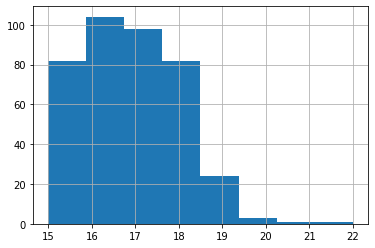

In [4]:
students.age.hist(bins=8)
students.age.describe()

Все значения возрастов входит в рассматриваемую группу от 15 до 22 лет, поэтому устранять выбросы не надо.

<p style='font-size:18px ; color: #008000;'>absences</p>
Распределение учеников по количеству пропущенных занятий

In [5]:
display(pd.DataFrame(students.absences.value_counts()))
students.loc[:, ['absences']].info()
print("Количество пустых значений:", students.absences.isna().sum())

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
Количество пустых значений: 12


count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

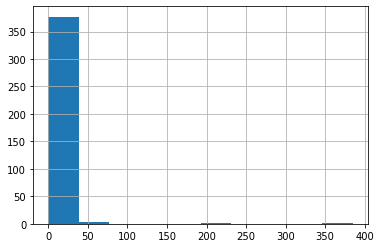

In [6]:
students.absences.hist()
students.absences.describe()

Устраняем выбросы:

Нижняя граница диапазона равна 0.

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [0, 20.0].


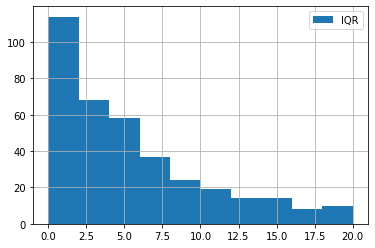

In [7]:
median = students.absences.median()
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{f}, {l}].".format(f=0, l=perc75 + 1.5*IQR))
students.absences.loc[students.absences.between(
    0, perc75 + 1.5*IQR)].hist(label='IQR')
plt.legend()

Избавляемся от строк с выбросами, но оставляем пустые значения, чтобы не потерять важную информацию по другим признакам:

In [8]:
students = students.loc[(students.absences.between(
    0, perc75 + 1.5*IQR)) | pd.isnull(students.absences)]

<p style='font-size:18px ; color: #008000;'>score</p>
Распределение учеников по баллам за экзамен

In [9]:
display(pd.DataFrame(students.score.value_counts()))
students.loc[:, ['score']].info()
print("Количество пустых значений:", students.score.isna().sum())

,score
50.0,54
55.0,42
0.0,37
75.0,33
60.0,31
65.0,30
40.0,28
70.0,27
45.0,23
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 378 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   372 non-null    float64
dtypes: float64(1)
memory usage: 5.9 KB
Количество пустых значений: 6


count    372.000000
mean      52.231183
std       23.072493
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

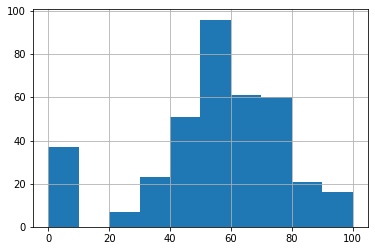

In [10]:
students.score.hist()
students.score.describe()

Как видно из распределения, на экзамене используется 100-бальная шкала.<br>
Проверяем, есть ли экстремально низкие или экстремально высокие оценки в пределах 100-бальной шкалы:

25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [0, 100].


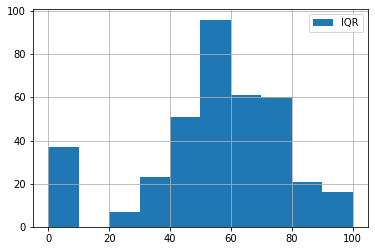

In [11]:
median = students.score.median()
IQR = students.score.quantile(0.75) - students.score.quantile(0.25)
perc25 = students.score.quantile(0.25)
perc75 = students.score.quantile(0.75)

f = max(0, (perc25 - 1.5*IQR))  # нижняя граница не может быть меньше 0
l = min((perc75 + 1.5*IQR), 100)  # верхняя граница не может быть больше 100

print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75),
      "IQR: {}, ".format(IQR), "Границы выбросов: [{}, {}].".format(f, l))
students.score.loc[students.score.between(0, 100)].hist(label='IQR')
plt.legend()

Экстремальных значений оценок нет, следовательно, мы принимаем во внимание все оценки от 0 до 100.<br>

Отфильровываем данные и избавляемся от строк с пустыми значениями для того, чтобы провести корректный t-тест по номинативным переменным:

In [12]:
students = students.loc[(students.score.between(0, 100))]

<p style='font-size:20px ; color: #ff0000;'>Номинативные переменные:</p>

<p style='font-size:18px ; color: #008000;'>school</p>
аббревиатура школы, в которой учится ученик

In [13]:
display(pd.DataFrame(students.school.value_counts()))
students.loc[:, ['school']].info()
print("Количество пустых значений:", students.school.isna().sum())

,school
GP,328
MS,44


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  372 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 0


<p style='font-size:18px ; color: #008000;'>sex</p>
пол ученика ('F' - женский, 'M' - мужской)

In [14]:
display(pd.DataFrame(students.sex.value_counts()))
students.loc[:, ['sex']].info()
print("Количество пустых значений:", students.sex.isna().sum())

,sex
F,191
M,181


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     372 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 0


<p style='font-size:18px ; color: #008000;'>address</p>
тип адреса ученика ('U' - городской, 'R' - за городом)

In [15]:
display(pd.DataFrame(students.address.value_counts()))
students.loc[:, ['address']].info()
print("Количество пустых значений:", students.address.isna().sum())

,address
U,276
R,81


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  357 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 15


<p style='font-size:18px ; color: #008000;'>famsize</p>
размер семьи('LE3' <= 3, 'GT3' >3)

In [16]:
display(pd.DataFrame(students.famsize.value_counts()))
students.loc[:, ['famsize']].info()
print("Количество пустых значений:", students.famsize.isna().sum())

,famsize
GT3,243
LE3,104


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  347 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 25


<p style='font-size:18px ; color: #008000;'>Pstatus</p>
статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

In [17]:
display(pd.DataFrame(students.Pstatus.value_counts()))
students.loc[:, ['Pstatus']].info()
print("Количество пустых значений:", students.Pstatus.isna().sum())

,Pstatus
T,300
A,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  332 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 40


<p style='font-size:18px ; color: #008000;'>Medu</p>
образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [18]:
display(pd.DataFrame(students.Medu.value_counts()))
students.loc[:, ['Medu']].info()
print("Количество пустых значений:", students.Medu.isna().sum())

,Medu
4.0,124
2.0,96
3.0,90
1.0,56
0.0,3


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    369 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Количество пустых значений: 3


<p style='font-size:18px ; color: #008000;'>Fedu</p>
образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

In [19]:
display(pd.DataFrame(students.Fedu.value_counts()))
students.loc[:, ['Fedu']].info()
print("Количество пустых значений:", students.Fedu.isna().sum())

,Fedu
2.0,100
3.0,87
4.0,84
1.0,75
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    349 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Количество пустых значений: 23


In [20]:
# заменяем ошибочное значение на пустое
students.loc[(students['Fedu'] == 40), 'Fedu'] = None

<p style='font-size:18px ; color: #008000;'>Mjob</p>
работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [21]:
display(pd.DataFrame(students.Mjob.value_counts()))
students.loc[:, ['Mjob']].info()
print("Количество пустых значений:", students.Mjob.isna().sum())

,Mjob
other,121
services,91
at_home,57
teacher,54
health,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    355 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 17


<p style='font-size:18px ; color: #008000;'>Fjob</p>
работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

In [22]:
display(pd.DataFrame(students.Fjob.value_counts()))
students.loc[:, ['Fjob']].info()
print("Количество пустых значений:", students.Fjob.isna().sum())

,Fjob
other,187
services,92
teacher,27
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    337 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 35


<p style='font-size:18px ; color: #008000;'>reason</p>
причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

In [23]:
display(pd.DataFrame(students.reason.value_counts()))
students.loc[:, ['reason']].info()
print("Количество пустых значений:", students.reason.isna().sum())

,reason
course,133
reputation,97
home,92
other,33


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  355 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 17


<p style='font-size:18px ; color: #008000;'>guardian</p>
опекун ('mother' - мать, 'father' - отец, 'other' - другое)

In [24]:
display(pd.DataFrame(students.guardian.value_counts()))
students.loc[:, ['guardian']].info()
print("Количество пустых значений:", students.guardian.isna().sum())

,guardian
mother,236
father,85
other,21


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  342 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 30


<p style='font-size:18px ; color: #008000;'>traveltime</p>
время в пути до школы (1 - 15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - 60 мин.)

In [25]:
display(pd.DataFrame(students.traveltime.value_counts()))
students.loc[:, ['traveltime']].info()
print("Количество пустых значений:", students.traveltime.isna().sum())

,traveltime
1.0,230
2.0,86
3.0,21
4.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  344 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Количество пустых значений: 28


<p style='font-size:18px ; color: #008000;'>studytime</p>
время на учёбу помимо школы в неделю (1 - 2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - 10 часов)

In [26]:
display(pd.DataFrame(students.studytime.value_counts()))
students.loc[:, ['studytime']].info()
print("Количество пустых значений:", students.studytime.isna().sum())

,studytime
2.0,178
1.0,99
3.0,61
4.0,27


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  365 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Количество пустых значений: 7


<p style='font-size:18px ; color: #008000;'>failures</p>
количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

In [27]:
display(pd.DataFrame(students.failures.value_counts()))
students.loc[:, ['failures']].info()
print("Количество пустых значений:", students.failures.isna().sum())

,failures
0.0,283
1.0,43
3.0,14
2.0,13


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  353 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Количество пустых значений: 19


<p style='font-size:18px ; color: #008000;'>schoolsup</p>
дополнительная образовательная поддержка (yes или no)

In [28]:
display(pd.DataFrame(students.schoolsup.value_counts()))
students.loc[:, ['schoolsup']].info()
print("Количество пустых значений:", students.schoolsup.isna().sum())

,schoolsup
no,317
yes,46


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  363 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 9


<p style='font-size:18px ; color: #008000;'>famsup</p>
семейная образовательная поддержка (yes или no)

In [29]:
display(pd.DataFrame(students.famsup.value_counts()))
students.loc[:, ['famsup']].info()
print("Количество пустых значений:", students.famsup.isna().sum())

,famsup
yes,207
no,131


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  338 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 34


<p style='font-size:18px ; color: #008000;'>paid</p>
дополнительные платные занятия по математике (yes или no)

In [30]:
display(pd.DataFrame(students.paid.value_counts()))
students.loc[:, ['paid']].info()
print("Количество пустых значений:", students.paid.isna().sum())

,paid
no,191
yes,143


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    334 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 38


<p style='font-size:18px ; color: #008000;'>activities</p>
дополнительные внеучебные занятия (yes или no)

In [31]:
display(pd.DataFrame(students.activities.value_counts()))
students.loc[:, ['activities']].info()
print("Количество пустых значений:", students.activities.isna().sum())

,activities
yes,187
no,171


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  358 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 14


<p style='font-size:18px ; color: #008000;'>nursery</p>
посещал детский сад (yes или no)

In [32]:
display(pd.DataFrame(students.nursery.value_counts()))
students.loc[:, ['nursery']].info()
print("Количество пустых значений:", students.nursery.isna().sum())

,nursery
yes,283
no,74


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  357 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 15


<p style='font-size:18px ; color: #008000;'>studytime, granular</p>

In [33]:
display(pd.DataFrame(students['studytime, granular'].value_counts()))
students.loc[:, ['studytime, granular']].info()
print("Количество пустых значений:",
      students['studytime, granular'].isna().sum())

,"studytime, granular"
-6.0,178
-3.0,99
-9.0,61
-12.0,27


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studytime, granular  365 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Количество пустых значений: 7


<b>studytime, granular</b> - переменная, которая имеет прямую зависимость с переменной <b>studytime</b>. Поэтому, можно удалить этот столбец из датасета.

In [34]:
del students['studytime, granular'] # удаляем столбец

<p style='font-size:18px ; color: #008000;'>higher</p>
хочет получить высшее образование (yes или no)

In [35]:
display(pd.DataFrame(students.higher.value_counts()))
students.loc[:, ['higher']].info()
print("Количество пустых значений:", students.higher.isna().sum())

,higher
yes,335
no,18


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  353 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 19


<p style='font-size:18px ; color: #008000;'>internet</p>
наличие интернета дома (yes или no)

In [36]:
display(pd.DataFrame(students.internet.value_counts()))
students.loc[:, ['internet']].info()
print("Количество пустых значений:", students.internet.isna().sum())

,internet
yes,285
no,54


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  339 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 33


<p style='font-size:18px ; color: #008000;'>romantic</p>
в романтических отношениях (yes или no)

In [37]:
display(pd.DataFrame(students.romantic.value_counts()))
students.loc[:, ['romantic']].info()
print("Количество пустых значений:", students.romantic.isna().sum())

,romantic
no,229
yes,113


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  342 non-null    object
dtypes: object(1)
memory usage: 5.8+ KB
Количество пустых значений: 30


<p style='font-size:18px ; color: #008000;'>famrel</p>
семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

In [38]:
display(pd.DataFrame(students.famrel.value_counts()))
students.loc[:, ['famrel']].info()
print("Количество пустых значений:", students.famrel.isna().sum())

,famrel
4.0,170
5.0,94
3.0,58
2.0,16
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  346 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Количество пустых значений: 26


In [39]:
# заменяем ошибочное значение на пустое
students.loc[(students['famrel'] == -1), 'famrel'] = None

<p style='font-size:18px ; color: #008000;'>freetime</p>
свободное время после школы (от 1 - очень мало до 5 - очень мого)

In [40]:
display(pd.DataFrame(students.freetime.value_counts()))
students.loc[:, ['freetime']].info()
print("Количество пустых значений:", students.freetime.isna().sum())

,freetime
3.0,147
4.0,108
2.0,59
5.0,36
1.0,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  365 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Количество пустых значений: 7


<p style='font-size:18px ; color: #008000;'>goout</p>
проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

In [41]:
display(pd.DataFrame(students.goout.value_counts()))
students.loc[:, ['goout']].info()
print("Количество пустых значений:", students.goout.isna().sum())

,goout
3.0,122
2.0,97
4.0,76
5.0,49
1.0,21


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   365 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Количество пустых значений: 7


<p style='font-size:18px ; color: #008000;'>health</p>
текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

In [42]:
display(pd.DataFrame(students.health.value_counts()))
students.loc[:, ['health']].info()
print("Количество пустых значений:", students.health.isna().sum())

,health
5.0,132
3.0,84
4.0,58
1.0,44
2.0,39


<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  357 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB
Количество пустых значений: 15


<p style='font-size:20px ; color: #ff0000;'>Корреляционный анализ количественных переменных:</p>

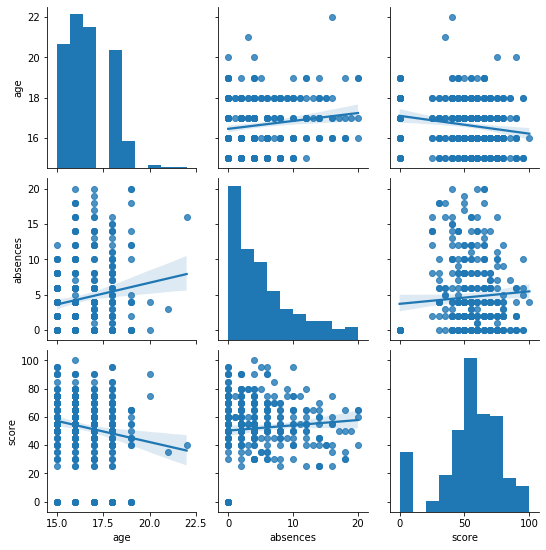

In [43]:
sns.pairplot(students, kind='reg',
             x_vars=["age", "absences", "score"],
             y_vars=["age", "absences", "score"],)

In [44]:
students[['age', 'absences', 'score']].corr()

,age,absences,score
age,1.000000,0.155469,-0.163081
absences,0.155469,1.000000,0.081274
score,-0.163081,0.081274,1.000000


Переменные <b>age</b> и <b>score</b> имеют слабую отрицательную корреляцию. При увеличении возраста учащагося балл за экзамен уменьшается.
Переменные <b>absences</b> и <b>score</b> имеют слабую положительную корреляцию. При увеличении пропущенных занятий балл за экзамен увеличивается.

Переменные слабоскоррелированные между собой, поэтому мы не можем исключить ни один из них.

<p style='font-size:20px ; color: #ff0000;'>Анализ номинативных переменных:</p>

Построим box-plot графики, которые показывают зависимость балла (score) от значения номинативных переменных.

In [45]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(6, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index)], ax=ax)
    ax.set_title('Boxplot for ' + column)
    plt.show()

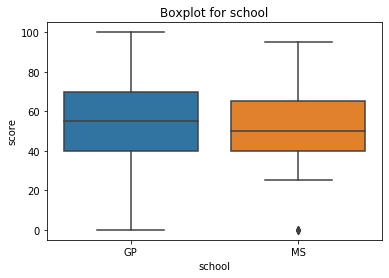

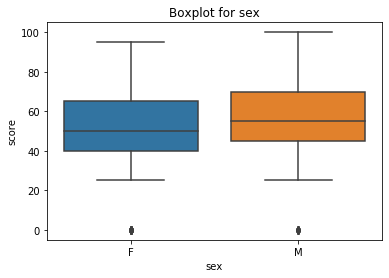

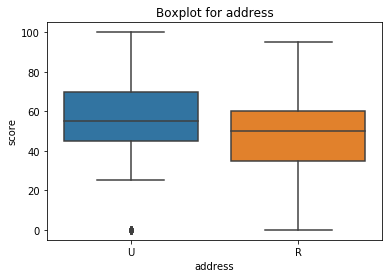

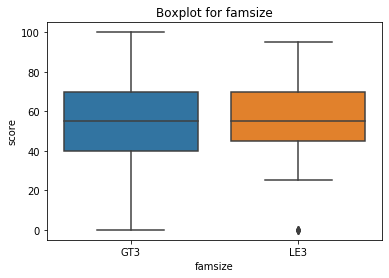

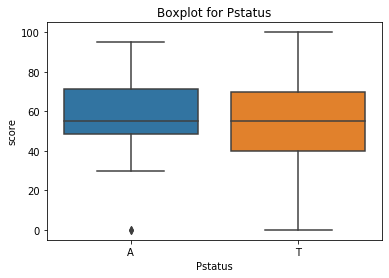

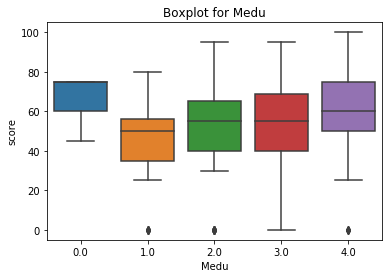

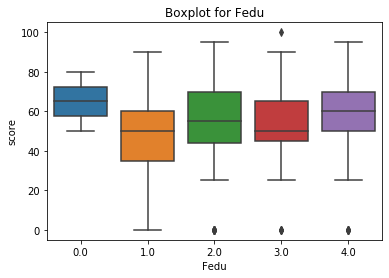

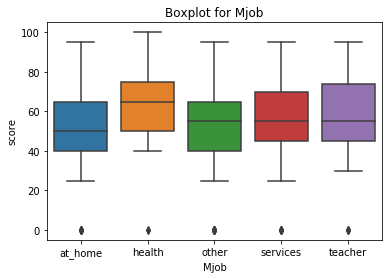

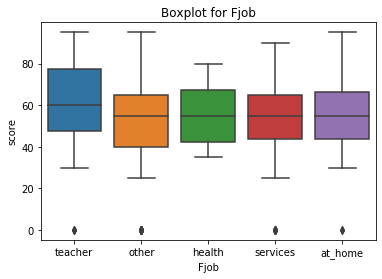

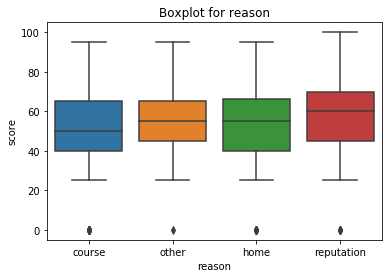

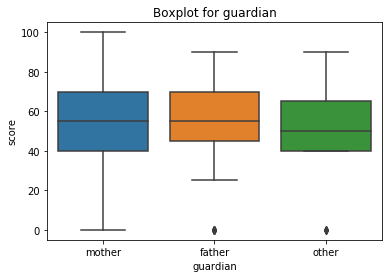

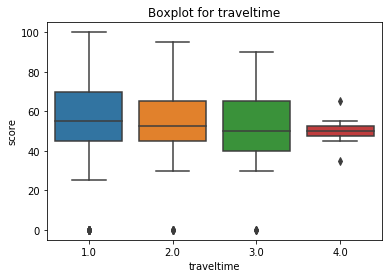

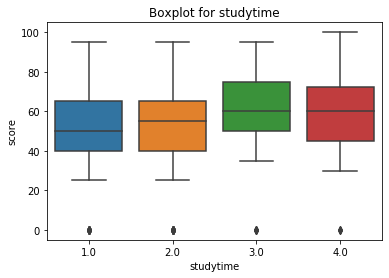

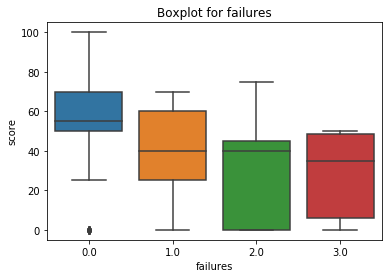

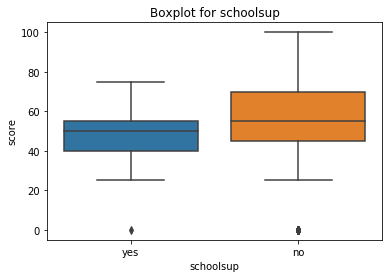

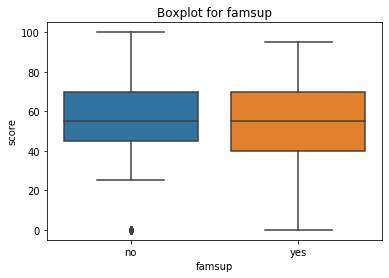

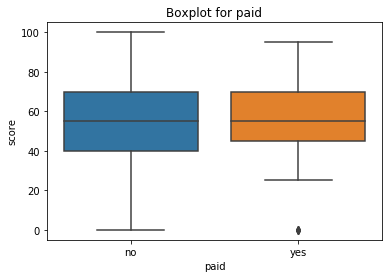

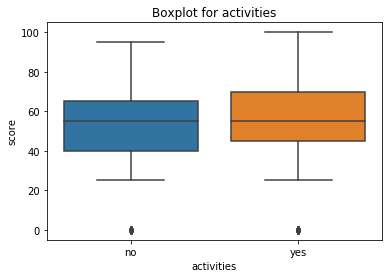

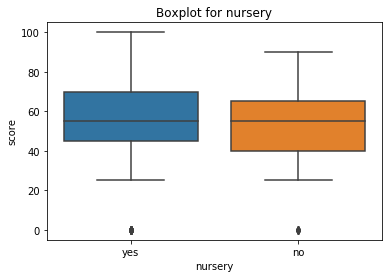

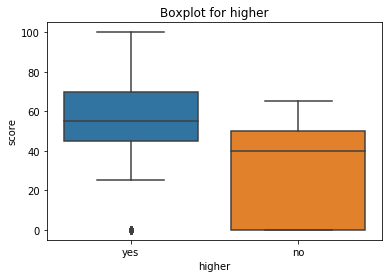

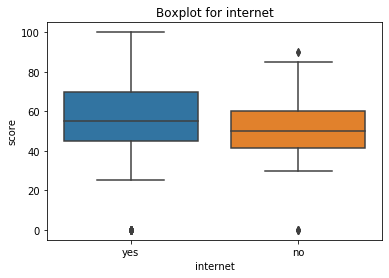

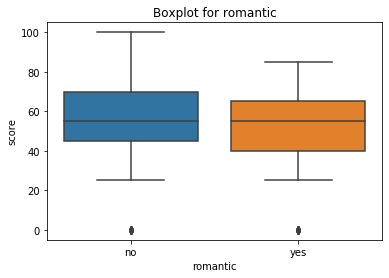

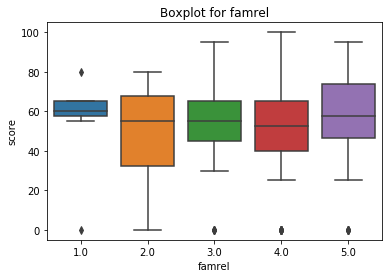

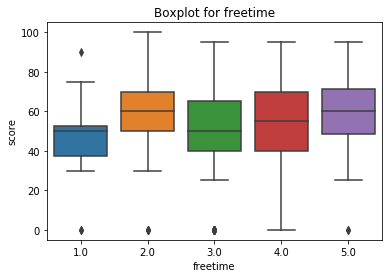

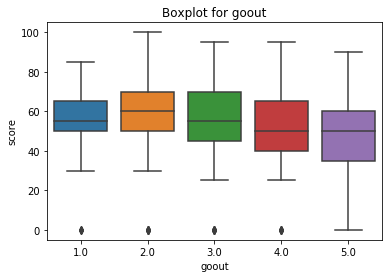

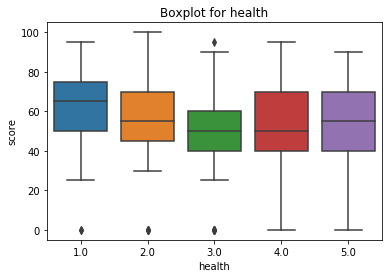

In [46]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
            'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_boxplot(col)

Проводим t-тест на выявления значимых на экзаменационный балл параметров:

In [47]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [48]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason',
            'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities',
            'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Мы получили переменные, которые, возможно оказывают влияние на параметр <b>score.</b><br>
Перед тем как их оставить в итоговом датасете, можно сделать проверку одного из этих параметров вручную.<br>
Анализируя графики box-plot графики, стоит еще раз проверить параметр <b>romantic</b> на предмет статистических различий.


<p style='font-size:18px ; color: #008000;'>Проверка гипотезы о влиянии параметра <b>romantic</b> на балл по экзамену (<b>score</b>):</p>

Проверяем допущения при использовании формул:
<ul>
 <li>Выборки взяты случайно</li>
 <li>Выборки взяты независимо друг от друга</li>
 <li>Выборки достаточно велики:</li>
         n1 = 113, n2 = 229
    
</ul>


1) Формулируем гипотезу:

    H0: μА = μB (μА - μB = 0)
    HA: μА != μB

2) Собираем наблюдения:

In [49]:
yes = students[students['romantic'] == 'yes']['score']
no = students[students['romantic'] == 'no']['score']

In [50]:
yes.describe()

count    113.000000
mean      47.389381
std       25.081095
min        0.000000
25%       40.000000
50%       55.000000
75%       65.000000
max       85.000000
Name: score, dtype: float64

In [51]:
no.describe()

count    229.000000
mean      54.475983
std       22.122775
min        0.000000
25%       45.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

In [52]:
X1 = yes.mean()
X2 = no.mean()
n1 = len(yes)
n2 = len(no)
s1 = yes.std()
s2 = no.std()

3) Мысленный эксперимент:

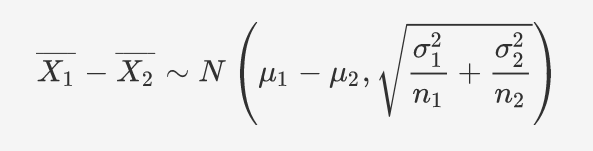

4) Считаем t-статистику и p-value:

In [53]:
st = (X1-X2) / ((((s1**2)/n1) + ((s2**2)/n2)) ** 0.5)  # t-статистика
print(st)

-2.553153246750645


In [54]:
2*t.cdf(st, 340)  # p-value

0.01111137582474933

In [55]:
# проверяем получившиеся значение через функцию weightstats.ttest_ind
weightstats.ttest_ind(yes, no, usevar='unequal')

(-2.553153246750644, 0.01142069398133032, 200.02145544934527)

In [56]:
2*t.cdf(st, 200)  # кореректируем степень свободы

0.011420775017135936

5) Сравниваем p-value с α:

    p-value = 0.0114
    α = 0.05
    
    p-value < α
    
    Нулевая гипотеза отвергается, следовательно параметр romantic действительно оказывает влияние на параметр score.

В конечном итоге, важные переменные, которые, возможно, оказывают влияние на балл, это:<br>
количественные переменные - <b>age, absences.</b><br>
номинативные переменные - <b>sex, address, Medu, Mjob, failures, paid, higher, romantic.</b><br>

Оставляем эти переменные в датасете для построения модели.

In [57]:
students_for_model = students.loc[:, ['sex', 'age', 'address', 'Medu', 'Mjob', 'failures', 'paid', 'higher',
                                      'romantic', 'absences']]
students_for_model.head()

,sex,age,address,Medu,Mjob,failures,paid,higher,romantic,absences
0,F,18,U,4.0,at_home,0.0,no,yes,no,6.0
1,F,17,U,1.0,at_home,0.0,no,yes,no,4.0
2,F,15,U,1.0,at_home,3.0,NaN,yes,NaN,10.0
3,F,15,U,4.0,health,0.0,yes,yes,yes,2.0
4,F,16,U,3.0,other,0.0,yes,yes,no,4.0


<b>Выводы:</b>

В результате EDA для анализа влияния различных параметров на итоговый балл <b>score</b> по госэкзамену по математике можно сделать следующие выводы:
<ul>
<li>В данных достаточно мало пустых значений.</li>
<li>Найдены и устранены выбросы в столбце количества пропущенных занятий <b>absences</b>.</li>
<li>Имеется слабая отрицательная корреляция между параметрами <b>age</b> и <b>score</b> и слабая положительная корреляция между параметрами <b>absences</b> и <b>score</b>.</li>
<li>Проведенный t-тест показал, что параметры <b>sex, address, Medu,  Mjob, failures, paid, higher, romantic</b> оказывают значительное влияние на успеваемость учеников.</li>
<li>Итого, самые важные параметры, которые предлагается использовать в дальнейшем для построения модели: <b>sex, age, address, Medu,  Mjob, failures, paid, higher, romantic, absences.</b></li>
  
</ul>
    